In [135]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [136]:
df = pd.read_csv('Customers.csv')

In [137]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [138]:
df.shape

(2000, 8)

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income ($)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>],
       [<Axes: title={'center': 'Work Experience'}>,
        <Axes: title={'center': 'Family Size'}>]], dtype=object)

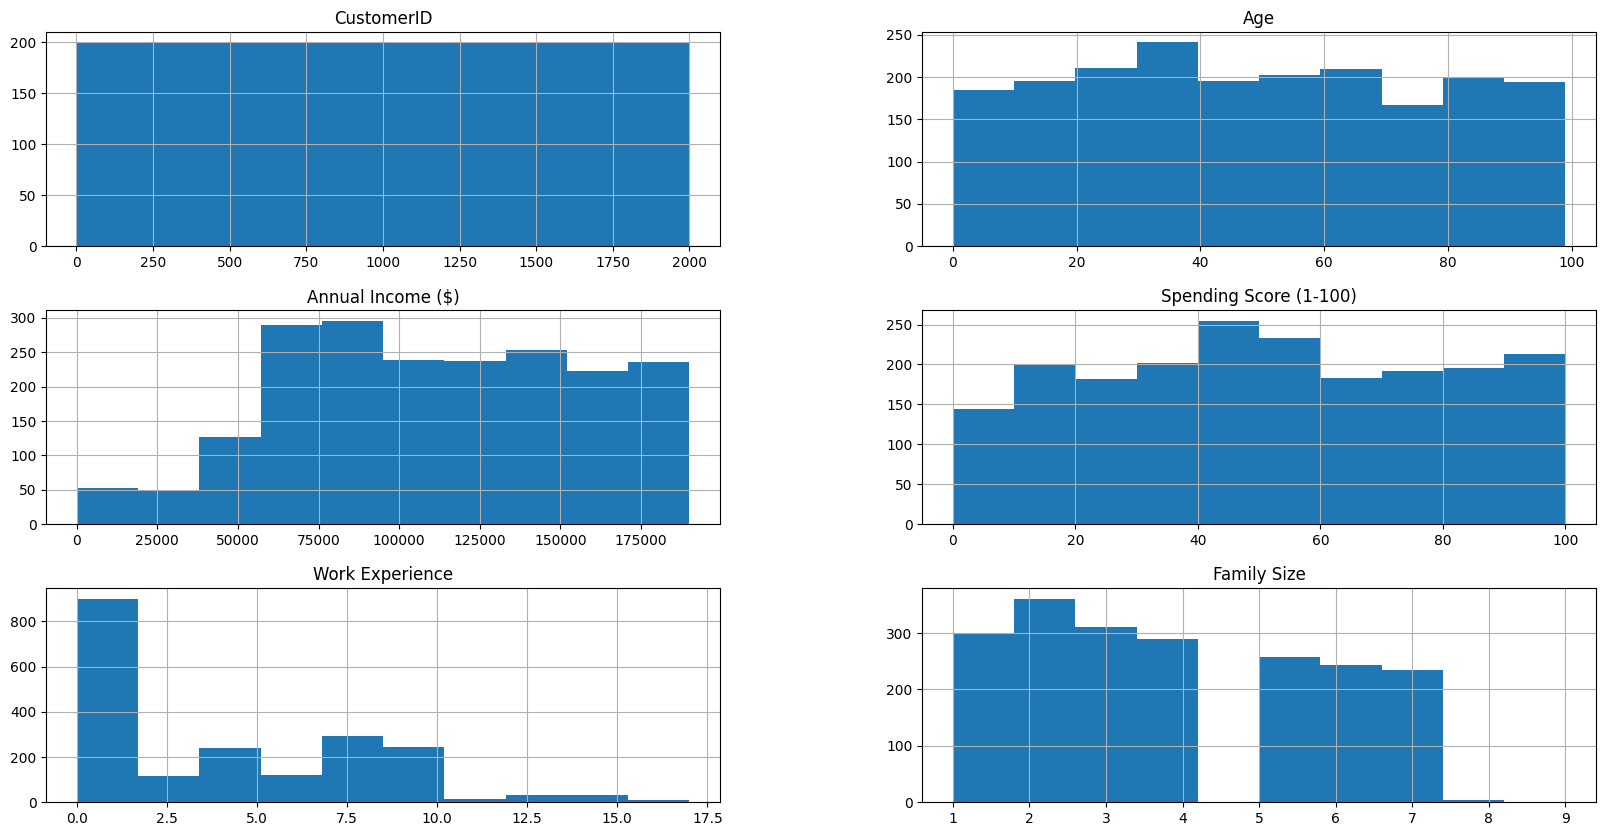

In [139]:
df.hist(figsize=(20, 10))

In [140]:
import seaborn as sns 


In [141]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income ($)         False
Spending Score (1-100)    False
Profession                 True
Work Experience           False
Family Size               False
dtype: bool

In [142]:
df.rename(columns = {'Spending Score (1-100)':'Spending Score'},
inplace=True)

In [143]:
df.rename(columns={"Annual Income ($)": 'Annual Income'},
inplace=True)

In [144]:
df['Profession'].isnull().sum()

35

In [145]:
df['Profession'].head()

0       Healthcare
1         Engineer
2         Engineer
3           Lawyer
4    Entertainment
Name: Profession, dtype: object

<Axes: >

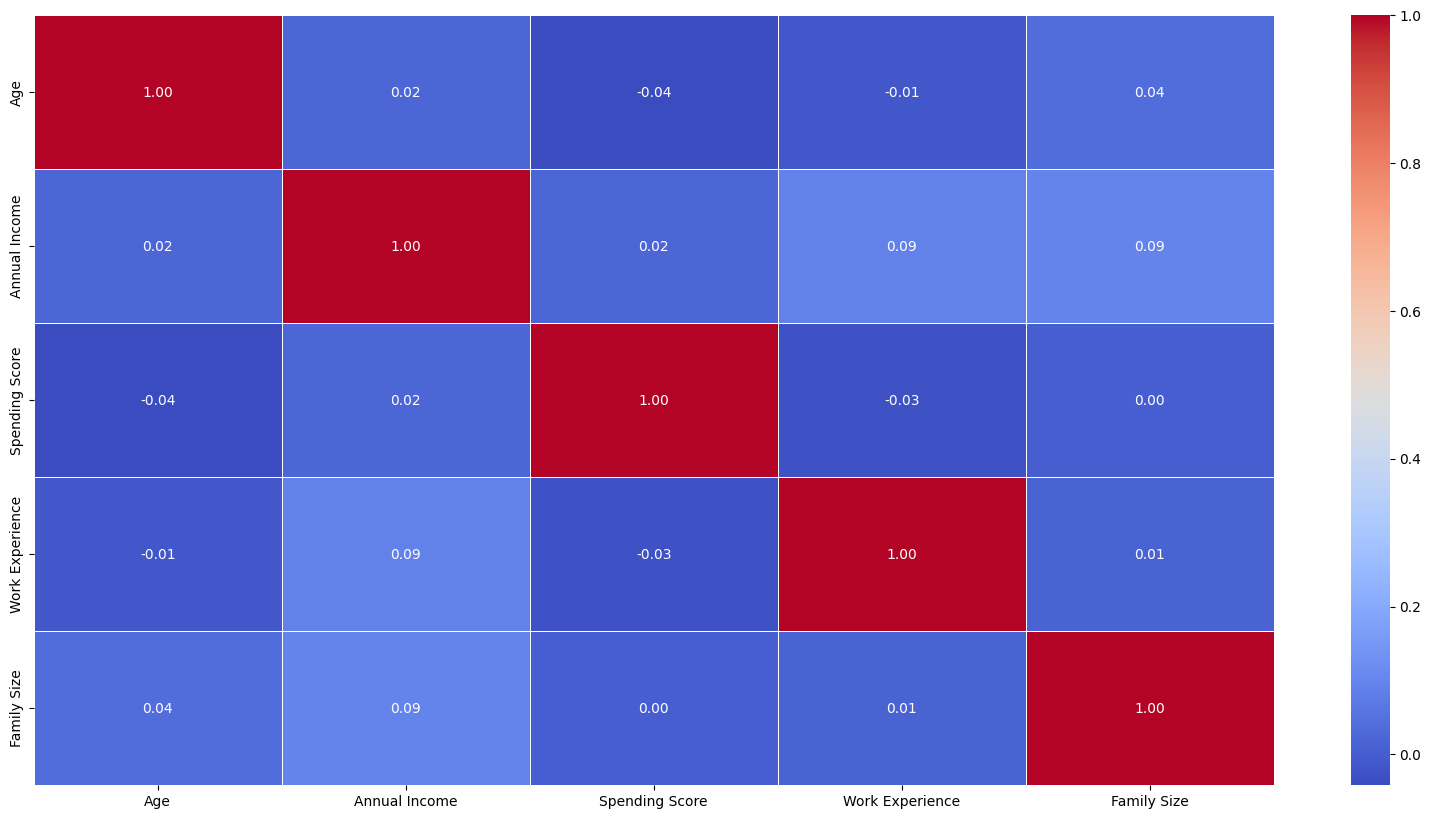

In [146]:

df_numerical = df.select_dtypes(include=['number'])
df_numerical = df_numerical.drop(columns=['CustomerID'])
# Calculate correlation
corr_matrix = df_numerical.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
linewidths=0.5)

In [147]:
df.dropna(subset=['Profession'], inplace=True)


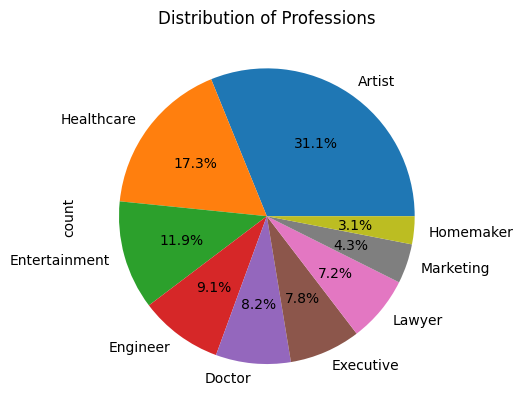

In [148]:
df['Profession'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Professions')
plt.show()


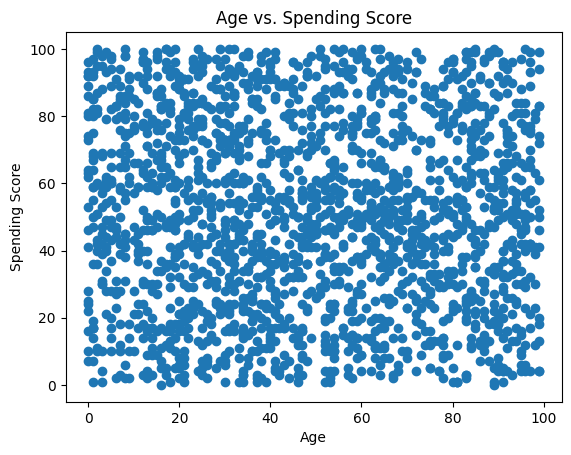

In [149]:
plt.scatter(df['Age'], df['Spending Score'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs. Spending Score')
plt.show()

In [150]:
y = df['Spending Score']
X = df.drop(columns='Spending Score')

In [151]:
X.head()

,CustomerID,Gender,Age,Annual Income,Profession,Work Experience,Family Size
0,1,Male,19,15000,Healthcare,1,4
1,2,Male,21,35000,Engineer,3,3
2,3,Female,20,86000,Engineer,1,1
3,4,Female,23,59000,Lawyer,0,2
4,5,Female,31,38000,Entertainment,2,6


In [152]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X['Gender'] = labelencoder.fit_transform(X['Gender'])
X.head()

,CustomerID,Gender,Age,Annual Income,Profession,Work Experience,Family Size
0,1,1,19,15000,Healthcare,1,4
1,2,1,21,35000,Engineer,3,3
2,3,0,20,86000,Engineer,1,1
3,4,0,23,59000,Lawyer,0,2
4,5,0,31,38000,Entertainment,2,6


In [153]:
X = pd.get_dummies(X, columns=['Profession'], prefix='Profession')

In [154]:
X = X.drop(columns=['CustomerID'])

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=45)
X_train.shape, y_train.shape 
X_test.shape, y_test.shape 

((393, 14), (393,))

In [156]:
X_train.shape, y_train.shape

((1572, 14), (1572,))

In [157]:
X_train.head()

,Gender,Age,Annual Income,Work Experience,Family Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
1915,0,18,134752,6,5,False,False,True,False,False,False,False,False,False
232,0,67,18000,0,2,False,False,False,False,False,False,False,True,False
770,1,78,54252,0,5,False,False,True,False,False,False,False,False,False
1463,0,83,125660,10,4,False,False,True,False,False,False,False,False,False
995,1,65,56583,2,3,False,False,False,False,False,True,False,False,False


In [158]:
X_n = X_train.drop(columns=['Gender','Profession_Artist',	'Profession_Doctor', 'Profession_Engineer',	'Profession_Entertainment',	'Profession_Executive',	'Profession_Healthcare',	'Profession_Homemaker',	'Profession_Lawyer',	'Profession_Marketing'])
X_t_n = X_test.drop(columns=['Gender','Profession_Artist',	'Profession_Doctor', 'Profession_Engineer',	'Profession_Entertainment',	'Profession_Executive',	'Profession_Healthcare',	'Profession_Homemaker',	'Profession_Lawyer',	'Profession_Marketing'])

In [159]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scaler = MinMaxScaler()
scaled_X_train = pd.DataFrame(std_scaler.fit_transform(X_n),
columns=X_n.columns, index=X_n.index)
scaled_X_test = pd.DataFrame(std_scaler.fit_transform(X_t_n),
columns=X_t_n.columns, index=X_t_n.index)

In [160]:
# Assigning the categorical columns without scaling
scaled_X_train[['Gender', 'Profession_Artist', 'Profession_Doctor', 
                'Profession_Engineer', 'Profession_Entertainment', 
                'Profession_Executive', 'Profession_Healthcare', 
                'Profession_Homemaker', 'Profession_Lawyer', 
                'Profession_Marketing']] = X[['Gender', 'Profession_Artist', 
                                              'Profession_Doctor', 'Profession_Engineer', 
                                              'Profession_Entertainment', 
                                              'Profession_Executive', 
                                              'Profession_Healthcare', 
                                              'Profession_Homemaker', 
                                              'Profession_Lawyer', 
                                              'Profession_Marketing']]

scaled_X_test[['Gender', 'Profession_Artist', 'Profession_Doctor', 
               'Profession_Engineer', 'Profession_Entertainment', 
               'Profession_Executive', 'Profession_Healthcare', 
               'Profession_Homemaker', 'Profession_Lawyer', 
               'Profession_Marketing']] = X[['Gender', 'Profession_Artist', 
                                             'Profession_Doctor', 'Profession_Engineer', 
                                             'Profession_Entertainment', 
                                             'Profession_Executive', 
                                             'Profession_Healthcare', 
                                             'Profession_Homemaker', 
                                             'Profession_Lawyer', 
                                             'Profession_Marketing']]



In [161]:
scaled_X_train.head()

,Age,Annual Income,Work Experience,Family Size,Gender,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
1915,0.181818,0.709318,0.352941,0.500,0,False,False,True,False,False,False,False,False,False
232,0.676768,0.094750,0.000000,0.125,0,False,False,False,False,False,False,False,True,False
770,0.787879,0.285576,0.000000,0.500,1,False,False,True,False,False,False,False,False,False
1463,0.838384,0.661459,0.588235,0.375,0,False,False,True,False,False,False,False,False,False
995,0.656566,0.297846,0.117647,0.250,1,False,False,False,False,False,True,False,False,False


In [162]:
from sklearn import svm
svm_model = svm.SVR()
svm_model.fit(scaled_X_train, y_train)

SVR()

In [163]:
svm_prediction = svm_model.predict(scaled_X_test)
from sklearn.metrics import mean_absolute_error
svm_mae = mean_absolute_error(y_test, svm_prediction)
svm_mae

23.84892111000519

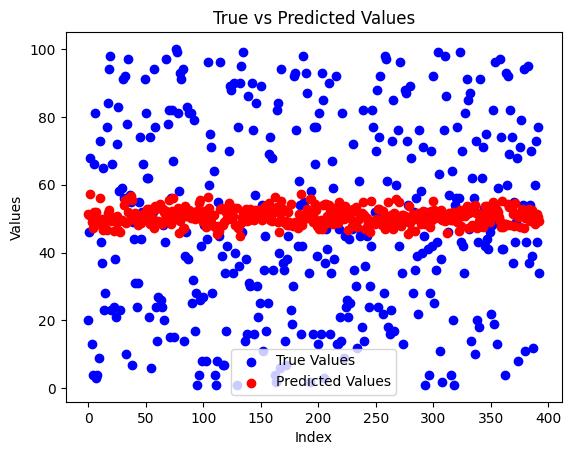

In [164]:
plt.scatter(range(len(y_test)), y_test, c='blue', label='True Values')
plt.scatter(range(len(svm_prediction)), svm_prediction, c='red', label='Predicted Values')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()

# Display the plot
plt.show()

In [165]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(scaled_X_train, y_train)
dt_prediction = dt_model.predict(scaled_X_test)
dt_mae = mean_absolute_error(y_test, dt_prediction)
dt_mae

32.7557251908397

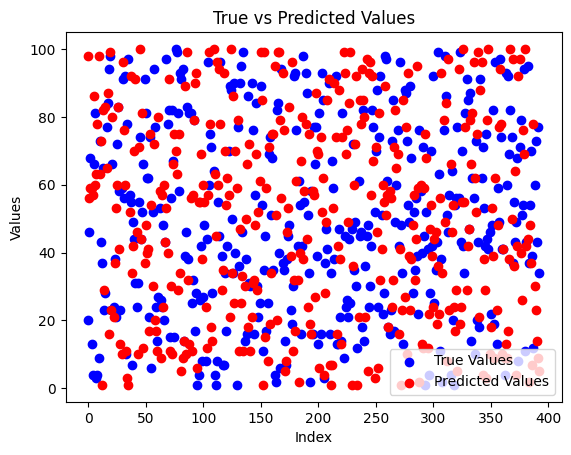

In [166]:
plt.scatter(range(len(y_test)), y_test, c='blue', label='True Values')
plt.scatter(range(len(dt_prediction)), dt_prediction, c='red', label='Predicted Values')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()

# Display the plot
plt.show()